<a href="https://colab.research.google.com/github/kyo1988/Kyo.github.io/blob/gh-pages/Business_Analytics_Note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

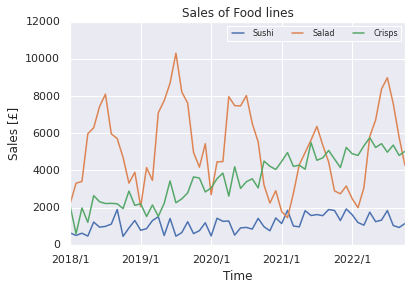

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd


from google.colab import files

import seaborn as sns
sns.set()

df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv')
#df.head()

# multiple line plot
# least combo
#plt.plot( 'Date', 'Wraps', data=df)
#plt.plot( 'Date', 'Sandwiches', data=df)
#plt.plot( 'Date', 'Pizza', data=df)

# highest combo
plt.plot( 'Date', 'Sushi', data=df)
plt.plot( 'Date', 'Salad', data=df)
plt.plot( 'Date', 'Crisps', data=df)

plt.xlabel('Time')
plt.ylabel('Sales [£]')

#plt.xticks(rotation=90);
plt.xticks([df['Date'][0], df['Date'][12], df['Date'][24], df['Date'][36], df['Date'][48]])
plt.title('Sales of Food lines')

# show a legend on the plot
plt.legend(loc='best', ncol=3, prop={'size':8})

#plt.savefig("Sales.png", bbox_inches='tight')
#files.download("Sales.png")

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from google.colab import files

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')

#'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'

# Multiplicative Decomposition 
#result_mul = seasonal_decompose(df['Crisps'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Crisps'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
# Multiplicative, Additive Decomposition figure
plt.savefig("SeasonalDecomposeCrisps.png")
files.download("SeasonalDecomposeCrisps.png")

plt.show()

In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from google.colab import files

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')

#'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
additive = df['Crisps']

# Additive Decomposition
ss_decomposition = seasonal_decompose(additive, model='additive', extrapolate_trend='freq')

estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
axes[0].plot(additive, 'k', label='Original Crisps Sales')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, 'r', label='Residuals')
axes[3].legend(loc='upper left')

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
plt.savefig("SeasonalDecomposeCrisps.png")
files.download("SeasonalDecomposeCrisps.png")

plt.show()

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from google.colab import files
from statsmodels.graphics.tsaplots import plot_acf
df = read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')

#'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
series = df['Crisps']

# ACF
plot_acf(series, title='Sales of Crisps Autocorrelation', lags=57)

#plt.xticks(visible=False)
plt.xlabel('Lag (Month)')

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
plt.savefig("Sales of Crisps Autocorrelation.png")
files.download("Sales of Crisps Autocorrelation.png")

pyplot.show()

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from google.colab import files
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')

#'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
series = df['Crisps']
lags = len(series)-1

# ACF, PACF
f, axarr = pyplot.subplots(1, 2, figsize=(20,5))
plot_acf(series, title='Sales of Crisps Autocorrelation', lags=lags, ax=axarr[0].axes)
plot_pacf(series, title='Sales of Crisps Partial Autocorrelation', lags=lags, ax=axarr[1].axes)

pyplot.suptitle('lags (Month): {}'.format(lags))

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
pyplot.savefig("Sales of Crisps Autocorrelation.png")
files.download("Sales of Crisps Autocorrelation.png")

pyplot.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
df = read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')

#'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
series = df['Crisps']

# ADF Test
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values %s:' %key)
    print(f' , {value}')

# KPSS Test
result = kpss(series, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values %s:' %key)
    print(f' {value}')

In [ ]:
# make series stationary
import numpy as np
import pandas as pd

from pandas import read_csv
import matplotlib.pyplot as plt
from google.colab import files
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

from statsmodels.tsa.seasonal import seasonal_decompose

# Using scipy: Subtract the line of best fit
#from scipy import signal

df = read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')


#for i in list(range(len(df)-1)):
# 'Wraps', 
# 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 
# 'Crisps'
series = df['Salad']

#decomposition = seasonal_decompose(series, model='additive', extrapolate_trend='freq')
# series = series - decomposition.trend
# series = np.log(decomposition.resid).dropna()

#series = series.diff().dropna()
#series = np.log(series).dropna()

series = series - series.rolling(window=9).mean().fillna(0)

# ADF Test
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values %s:' %key)
    print(f' , {value}')

# KPSS Test
result = kpss(series, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values %s:' %key)
    print(f' {value}')


ADF Statistic: -4.506459786669544
p-value: 0.00019142196129755856
Critial Values 1%:
 , -3.5656240522121956
Critial Values 5%:
 , -2.920142229157715
Critial Values 10%:
 , -2.598014675124952

KPSS Statistic: 0.304168
p-value: 0.100000
Critial Values 10%:
 0.347
Critial Values 5%:
 0.463
Critial Values 2.5%:
 0.574
Critial Values 1%:
 0.739


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [ ]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# load dataset
df = read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')
# 'Wraps'
series = df['Crisps']

# 'Sandwiches', 'Pizza', 'Sushi', 'Crisps'
#series = series.diff().dropna()

#'Salad'
#series = series - series.rolling(window=9).mean().fillna(0)

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

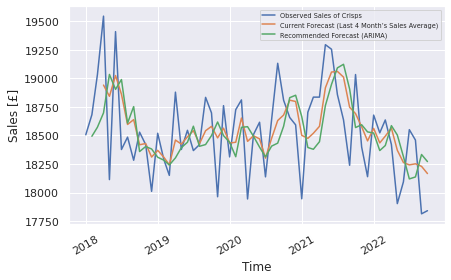

6062133.901784998


In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#plt.style.use('classic')
plt.style.use('fivethirtyeight')
%matplotlib inline

from google.colab import files
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error

import seaborn as sns
sns.set()

# load dataset
df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
series = df['Wraps']

#ARIMA Model
model = ARIMA(series, order=(2,1,0))
model_fit = model.fit(disp=0)
futureModel = model_fit.predict(typ='levels')
#futureModel = model_fit.predict() # For Pizza ARIMA(8,0,0) and Sandwiches ARIMA(2,0,1)
futureModel = pd.DataFrame(futureModel, index = series.index)

currentModel = series.rolling(window=4).mean()

plt.xlabel('Time')
plt.ylabel('Sales [£]')

plt.plot(series, label='Observed Sales of Crisps')
plt.plot(currentModel, label='Current Forecast (Last 4 Month’s Sales Average)')
plt.plot(futureModel, label='Recommended Forecast (ARIMA)')

# show a legend on the plot
plt.legend(loc='best', prop={'size':6.5})
plt.xticks(rotation=30);

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
#plt.savefig("Forecast Sales of Crisps using ARIMA.png", bbox_inches='tight')
#files.download("Forecast Sales of Crisps using ARIMA.png")

plt.show()

print(mean_squared_error(series, futureModel.fillna(0)))

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import matplotlib

# load dataset
df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')
# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
series = df['Pizza']

p = range(0, 11)
d = range(0, 2)
q = range(0, 1)
pdq = list(itertools.product(p, d, q))

def _get_best_model(TS):
  best_aic = np.inf 
  best_param = None
  best_mdl = None             

  for param in pdq:
    try:
        mod = ARIMA(TS, order=param)
        results = mod.fit(disp=0)
        tmp_aic = results.aic
        if tmp_aic < best_aic:
          best_aic = tmp_aic
          best_param = param
          best_mdl = results
    except:continue
  print('ARIMA{} - AIC:{}'.format(best_param, best_aic))
  return best_param, best_aic, best_mdl  
res_tup = _get_best_model(series)
print(res_tup)

ARIMA(10, 1, 0) - AIC:1213.5505470386602
((10, 1, 0), 1213.5505470386602, <statsmodels.tsa.arima_model.ARIMAResultsWrapper object at 0x7f31da724b70>)


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

# load dataset
df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
series = df['Wraps']

resDiff = sm.tsa.arma_order_select_ic(series, max_ar=10, max_ma=10, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (0, 0) is the best.


In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

# load dataset
df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')
# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
series = df['Crisps']

p = range(0, 11)
d = range(0, 2)
q = range(0, 1)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

def _get_best_model(TS):
  best_aic = np.inf 
  best_param = None
  best_param_seasonal = None  
  best_mdl = None             

  for param in pdq:
      for param_seasonal in seasonal_pdq:
          try:
              mod = sm.tsa.statespace.SARIMAX(TS,
                                              order=param,
                                              seasonal_order=param_seasonal,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
              results = mod.fit()
              tmp_aic = results.aic
              if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_param = param
                best_param_seasonal = param_seasonal              
                best_mdl = results
          except:continue
  print('ARIMA{}x{}12 - AIC:{}'.format(best_param, best_param_seasonal, best_aic))
  return best_param, best_param_seasonal, best_aic, best_mdl  
res_tup = _get_best_model(series)
print(res_tup)

ARIMA(8, 0, 0)x(3, 1, 0, 12)12 - AIC:25.22229649202668
((8, 0, 0), (3, 1, 0, 12), 25.22229649202668, <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x7f9863871048>)


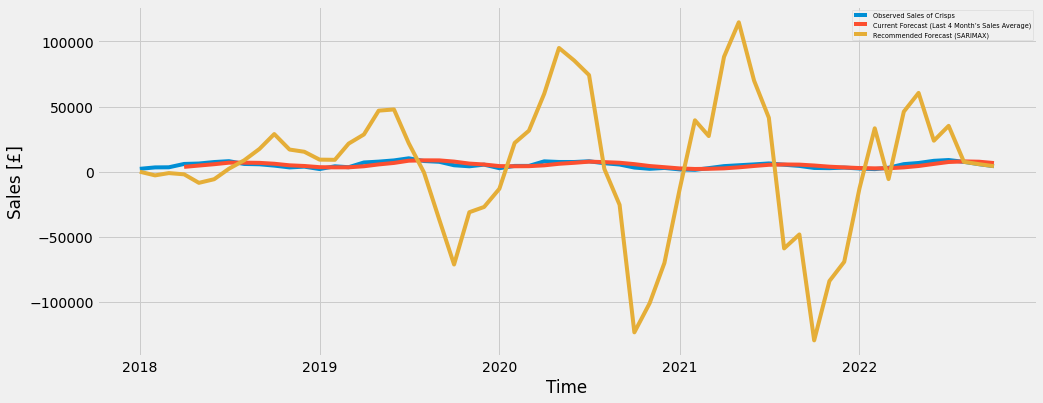

2439548015.2459245


In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from google.colab import files

from sklearn.metrics import mean_squared_error, mean_absolute_error

# load dataset
df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')
# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
series = df['Salad']

param = (6, 1, 0)
param_seasonal = (4, 0, 0, 12)

model = sm.tsa.statespace.SARIMAX(series, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)

model_fit = model.fit(disp=0)
futureModel = model_fit.predict(typ='levels')
#futureModel = model_fit.predict() # For Pizza and Sandwiches
futureModel = pd.DataFrame(futureModel, index = series.index)

currentModel = series.rolling(window=4).mean()

plt.xlabel('Time')
plt.ylabel('Sales [£]')

plt.plot(series, label='Observed Sales of Crisps')
plt.plot(currentModel, label='Current Forecast (Last 4 Month’s Sales Average)')
plt.plot(futureModel, label='Recommended Forecast (SARIMAX)')

# show a legend on the plot
plt.legend(loc='best', prop={'size':6.5})
#plt.xticks(rotation=30);

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
#plt.savefig("Forecast Sales of Crisps using SARIMAX.png", bbox_inches='tight')
#files.download("Forecast Sales of Crisps using SARIMAX.png")

plt.show()

print(mean_squared_error(series, futureModel))

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.471e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


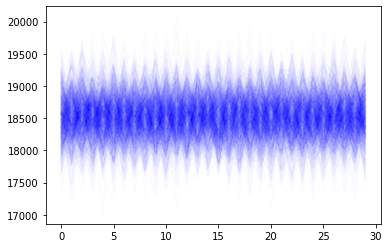

17944.21280977097


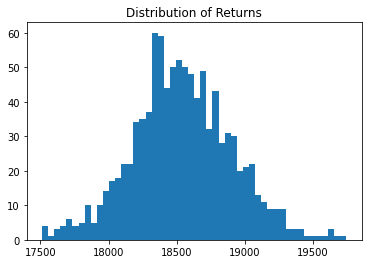

In [ ]:
#!pip install arch

# Generalized Autoregressive Conditionally Heteroskedastic Models - GARCH(p,q)
import os
import sys

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# load dataset
df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
series = df['Wraps']

def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(5) # [0,1,2,3,4]
    d_rng = range(2) # [0,1]
    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

# Notice I've selected a specific time period to run this analysis
#res_tup = _get_best_model(series)
#aic: 845.97752 | order: (0, 1, 1)
best_order = [0, 1, 1]

# Now we can fit the arch model using the best fit arima model parameters

p_ = best_order[0]
o_ = best_order[1]
q_ = best_order[2]

# Using student T distribution usually provides better fit
am = arch_model(series, p= p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
#print(res.summary())

forecasts = res.forecast(horizon=30, method='simulation', simulations=1000)
sims = forecasts.simulations

lines = plt.plot(sims.values[-1,:,:].T, color='blue', alpha=0.01)
lines[0].set_label('Simulated paths')
plt.show()

print(np.percentile(sims.values[-1,:,-1].T,5))
plt.hist(sims.values[-1, :,-1],bins=50)
plt.title('Distribution of Returns')
plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None
Test RMSE: 464.060
Test MSE: 215351.446


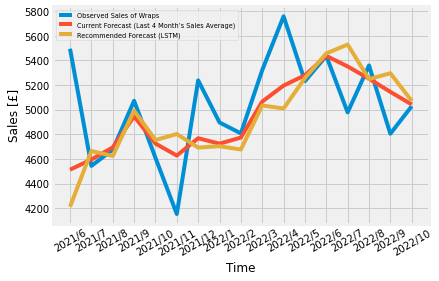

In [ ]:
# https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
# https://www.tensorflow.org/tutorials/structured_data/time_series
# https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial
# https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/
# https://www.kaggle.com/ternaryrealm/lstm-time-series-explorations-with-keras

#!pip install tensorflow==1.11.0
#!pip install keras==2.1.2

# univariate lstm example
from numpy import array
import pandas as pd

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

#pyplot.style.use('classic')
pyplot.style.use('fivethirtyeight') # For plots
%matplotlib inline

from google.colab import files

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# load dataset
# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv', usecols=['Crisps'], engine='python')

# Current Method
df2 = df.copy()
df2 = df2.rolling(window=4).mean()#.fillna(0)

raw_seq = df.to_numpy()

# split into train and test sets
TRAIN_SIZE = 0.67
train_size = int(len(raw_seq) * TRAIN_SIZE)
test_size = len(raw_seq) - train_size
train, test = raw_seq[0:train_size,:], raw_seq[train_size:len(raw_seq),:]

# choose a number of time steps
n_steps = 3

# split into samples
X_train, y_train = split_sequence(train, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

# define model
model = Sequential()
#model.add(Embedding(n_features, 100))
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
#model.add(Bidirectional(LSTM(100, activation='relu', input_shape=(n_steps, n_features))))
model.add(Dropout(0.5))
#model.add(Dense(1))
model.add(Dense(n_features))
model.add(Activation("linear"))
#model.compile(optimizer='adam', loss='mse')
model.compile(optimizer=RMSprop(), loss='mae')

# fit model
model.fit(X_train, y_train, epochs=1000, verbose=0)

# demonstrate prediction
X_test, y_test = split_sequence(test, n_steps)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
testPredict = model.predict(X_test, verbose=0)
trainPredict = model.predict(X_train, verbose=0)

print(model.summary())

# report performance
rmse = sqrt(mean_squared_error(y_test, testPredict))
print('Test RMSE: %.3f' % rmse)
mse = mean_squared_error(y_test, testPredict)
print('Test MSE: %.3f' % mse)

# line plot of observed vs predicted
pyplot.xlabel('Time')
pyplot.ylabel('Sales [£]')

x = ['2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12', '2022/1', '2022/2', '2022/3', '2022/4', '2022/5', '2022/6', '2022/7', '2022/8', '2022/9', '2022/10']
xi = list(range(len(x)))

pyplot.plot(xi, y_test, label='Observed Sales of Wraps')
pyplot.plot(xi, df2.tail(17), label='Current Forecast (Last 4 Month’s Sales Average)')
pyplot.plot(xi, testPredict, label='Recommended Forecast (LSTM)')

# show a legend on the plot
pyplot.legend(loc='best', prop={'size':6.5})
pyplot.xticks(rotation=30);
pyplot.xticks(xi, x)

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
#pyplot.savefig("Forecast Sales of Wraps using LSTM.png", bbox_inches='tight')
#files.download("Forecast Sales of Wraps using LSTM.png")

pyplot.show()

#plot_model(model, show_shapes=True, to_file='LSTM model of Pizza.png')
#files.download("LSTM model of Pizza.png")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


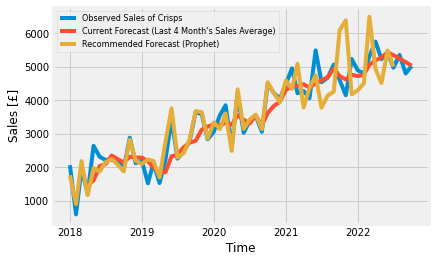

311851.8711508836


In [ ]:
# Time Series Forecasting using Facebook's Prophet
# https://www.kaggle.com/robikscube/time-series-forecasting-with-prophet
# https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887
# https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3
# http://www.insightsbot.com/times-series-forecasting-with-python-using-prophet/

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots

%matplotlib inline

from google.colab import files

# load dataset
df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
series = df['Crisps']

series_pr = series.copy()
series_pr = series.reset_index()

# To use prophet column names should be like that
series_pr.columns = ['ds','y']

# split into train and test sets
TRAIN_SIZE = 0.67
train_size = int(len(series_pr) * TRAIN_SIZE)
train, test = series_pr[0:train_size], series_pr[train_size:]

# set the uncertainty interval to 95% (the Prophet default is 80%)
model = Prophet(interval_width=0.95)
model.add_seasonality(name='monthly', period=12, fourier_order=5)
model.fit(train)

# MS is the start of the month
future = model.make_future_dataframe(periods=17,freq='MS')
prophet_pred = model.predict(future)

series_pr['MA4'] = series_pr.rolling(window=4).mean()

plt.xlabel('Time')
plt.ylabel('Sales [£]')

plt.plot(series_pr.ds, series_pr['y'], label='Observed Sales of Crisps')
plt.plot(series_pr.ds, series_pr['MA4'], label='Current Forecast (Last 4 Month’s Sales Average)')
plt.plot(prophet_pred.ds, prophet_pred['yhat'], label='Recommended Forecast (Prophet)')

plt.legend(loc='best', prop={'size':8})

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
#plt.savefig("Forecast Sales of Crisps using Prophet.png", bbox_inches='tight')
#files.download("Forecast Sales of Crisps using Prophet.png")

plt.show()

metric_df = prophet_pred.set_index('ds')[['yhat']].join(series_pr.set_index('ds').y).reset_index()
print(mean_squared_error(metric_df.y, metric_df.yhat))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so infer

         Current function value: 7.480004
         Iterations: 50
         Function evaluations: 77
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 6.295247
         Iterations: 138
         Function evaluations: 250
Optimization terminated successfully.
         Current function value: 6.295247
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 6.114646
         Iterations: 383
         Function evaluations: 663
Optimization terminated successfully.
         Current function value: 6.114646
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 6.114646
         Iterations: 118
         Function evaluations: 215
Optimization terminated successfully.
         Current function value: 6.114646
         Iterations: 0
     

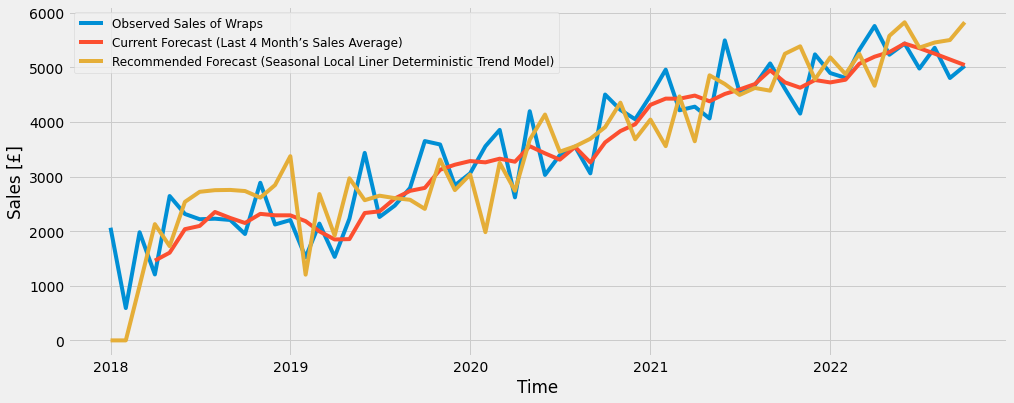

496321.1712670134


In [ ]:
# State Space Models and the Kalman Filter
# https://logics-of-blue.com/python-state-space-models/
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.fit.html#statsmodels.tsa.statespace.structural.UnobservedComponents.fit
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.structural.UnobservedComponents.html#statsmodels.tsa.statespace.structural.UnobservedComponents

import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.metrics import mean_squared_error, mean_absolute_error

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import statsmodels.api as sm

from google.colab import files

# load dataset
df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv', parse_dates=['Date'], index_col='Date')

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
series = df['Crisps']

mod_local_level = sm.tsa.UnobservedComponents(series, 'local level')
mod_trend = sm.tsa.UnobservedComponents(series, 'local linear trend')
mod_season_local_level = sm.tsa.UnobservedComponents(series, 'local level', seasonal=12)
mod_season_trend = sm.tsa.UnobservedComponents(series, 'local linear trend', seasonal=12)
mod_season_trend_d = sm.tsa.UnobservedComponents(series, 'local linear deterministic trend', seasonal=12)
mod_season_rw = sm.tsa.UnobservedComponents(series, 'random walk with drift', seasonal=12)

res_local_level = mod_local_level.fit()
res_trend = mod_trend.fit(method='bfgs')
res_season_local_level = mod_season_local_level.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_local_level.fit(method='nm', maxiter=500).params,
)
res_season_trend = mod_season_trend.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_trend.fit(method='nm', maxiter=500).params,
)
res_season_trend_d = mod_season_trend_d.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_trend_d.fit(method='nm', maxiter=500).params,
)
res_season_rw = mod_season_rw.fit(
    method='bfgs', 
    maxiter=500, 
    start_params=mod_season_rw.fit(method='nm', maxiter=500).params,
)

#print(res_local_level.summary())
#print(res_trend.summary())
#print(res_season_local_level.summary())
#print(res_season_trend.summary())
#print(res_season_trend_d.summary())
#print(res_season_rw.summary())

#rcParams['figure.figsize'] = 15, 15
#fig = res_local_level.plot_components()
#rcParams['figure.figsize'] = 15, 20
#fig = res_trend.plot_components()
#fig = res_season_local_level.plot_components()
#fig = res_season_trend.plot_components()
#fig = res_season_trend_d.plot_components()
#fig = res_season_rw.plot_components()

#aic_list = pd.DataFrame(index=range(6), columns=["model", "aic"])

#aic_list["model"][0] = "res_local_level"
#aic_list["aic"][0] = res_local_level.aic

#aic_list["model"][1] = "res_trend"
#aic_list["aic"][1] = res_trend.aic

#aic_list["model"][2] = "res_season_local_level"
#aic_list["aic"][2] = res_season_local_level.aic

#aic_list["model"][3] = "res_season_trend"
#aic_list["aic"][3] = res_season_trend.aic

#aic_list["model"][4] = "res_season_trend_d"
#aic_list["aic"][4] = res_season_trend_d.aic

#aic_list["model"][5] = "res_season_rw"
#aic_list["aic"][5] = res_season_rw.aic

#aic_list

# line plot of observed vs predicted
plt.xlabel('Time')
plt.ylabel('Sales [£]')

currentModel = series.rolling(window=4).mean()

pred = res_season_trend_d.predict()
#pred = res_season_rw.predict()

rcParams['figure.figsize'] = 15, 6
plt.plot(series, label='Observed Sales of Wraps')
plt.plot(currentModel, label='Current Forecast (Last 4 Month’s Sales Average)')
plt.plot(pred, label='Recommended Forecast (Seasonal Local Liner Deterministic Trend Model)')

# show a legend on the plot
plt.legend(loc='best', prop={'size':12})

# 'Wraps', 'Sandwiches', 'Pizza', 'Sushi', 'Salad', 'Crisps'
#plt.savefig("Forecast Sales of Wraps using Seasonal Local Liner Deterministic Trend Model.png", bbox_inches='tight')
#files.download("Forecast Sales of Wraps using Seasonal Local Liner Deterministic Trend Model.png")

plt.show()

#metric_df = prophet_pred.set_index('ds')[['yhat']].join(series_pr.set_index('ds').y).reset_index()
print(mean_squared_error(series, pred))